# Hierarchical Clustering

Produces a hierarchy (dendrogram) of nested clusters that can be analyzed and visualized.
We analyze the <b>agglomerative</b> methods: Start individual clusters, at each step, merge the closest pair of clusters until only one cluster (or k clusters) left

## Agglomerative Clustering Algorthm
The algorithm follow three main steps:
1. Compute proximity matrix of pairwise distance between all points
2. Let each data point be a cluster
3. Repeat until a single cluster remains:
    - Merge two closest clusters
    - Update proximity matrix

Different approaches to defining the distance between clusters distinguish the different algorithms.
<br>
No need to assume any particular number of clusters:
- Any desired number of clusters can be obtained by ‘cutting’ the dendrogram at the proper level

## Time and Memory Complexity
- Memory: $O(N^2)$, since it uses the proximity matrix ($N$ is the number of points)
- Time: $O(N^3)$ can be reduced to $O(N^2logN)$, there are N steps and at each step the size, N2, proximity matrix must be updated and searched.

## How is updated the Proximity Matrix?
After find the two closet clusters, we want to merge them but we have to decide how to compute the similarity distance.
We have four main alternatives to compute the distance between clusters:
- Single Linkage (or MIN): smallest distance between an element in one cluster and an element in the other, $d(C_i, C_j) = min(t_i,_p, t_j,_p)$
- Complete Linkage (or MAX): largest distance between an element in one cluster and an element in the other, $d(C_i, C_j) = max(t_i,_p, t_j,_p)$
- Mean Distance: distance between the centroids of two clusters, $d(C_i, C_j) = d(\mu_i, \mu_j)$
- Group Average: average distance between an element in one cluster and an element in the other, $d(C_i, C_j) = avg(d(t_i,_p, t_j,_p))$

## Determine the Number of Clusters
The idea:
- Data points in the same cluster should have a small distance from one another
- Data points in different clusters should be at a large distance from one another.

### Clustering Quality Measures
- Internal Validation Measures:
    - Employ criteria which are derived from the data itself
    - Cohesion and Separation Measures
        - Cohesion evaluates how similar are the points in the same cluster
        - Separation, how far apart are the points in different clusters
- External Validation Measures:
    - Use prior or expert-specified knowledge about the clusters
    - For example using the known the class labels
- Relative Validation Measures

### Cohesion Measures
Cohesion evaluates how similar are the points in the same cluster
$$
WSS(C) = \sum_{i=1}^{k}{\sum_{x_j \in C_i}{d(x_j, \mu_i)^2}}
$$
where $\mu_i$ is the centroid of cluster Ci (in case of Euclidean spaces)

### Separation Measure
Separation, how far apart are the points in different clusters
$$
BSS(C) = \sum_{i=1}^{k}{|C_i|d(x_j, \mu_i)^2}
$$
where $\mu$ is the centroid of the whole dataset

## Evaluating using the Knee/Elbow Analysis
Plot the WSS and BSS for every clustering and look for a knee in the plot that show a significant modification in the evaluation metrics

## Example 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.datasets import make_blobs

# we are using the scipy implementation
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

%matplotlib inline

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [2]:
# Create artificial dataset, they are three blobs to analyze

random_state = 12345 ## another interesting example can be generated using the seed 36
no_clusters = 3
no_samples = 1500

x, y = make_blobs(centers=no_clusters, n_samples=no_samples, random_state=random_state)

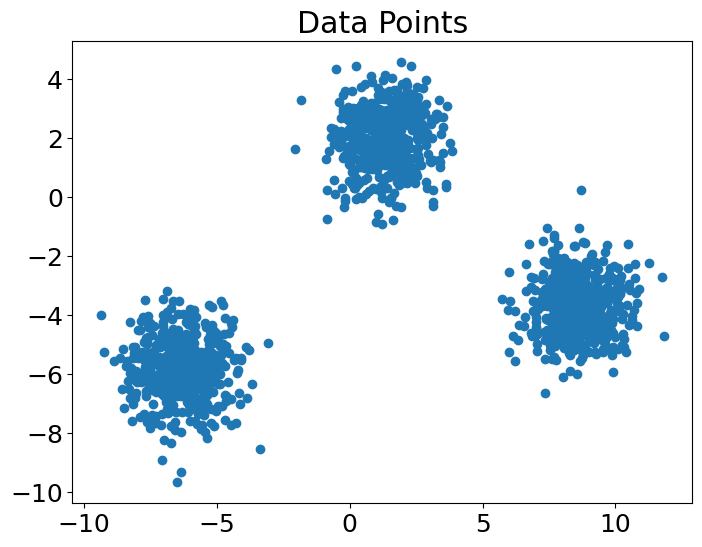

In [3]:
# Let's plot them

plt.figure(figsize=(8, 6));
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.scatter(x[:,0],x[:,1], cmap=plt.get_cmap('Pastel1'));
plt.title("Data Points");

In [4]:
# We generate the dendrogram using single linkage. The matrix z contains one raw for every merge operation.

z = linkage(x, 'single')
print('z has %d rows'%(z.shape[0]))
print('The first merge was done between %d and %d based on a distance of %.5f '%(z[0][0],z[0][1],z[0][2]))

z has 1499 rows
The first merge was done between 454 and 1388 based on a distance of 0.00526 


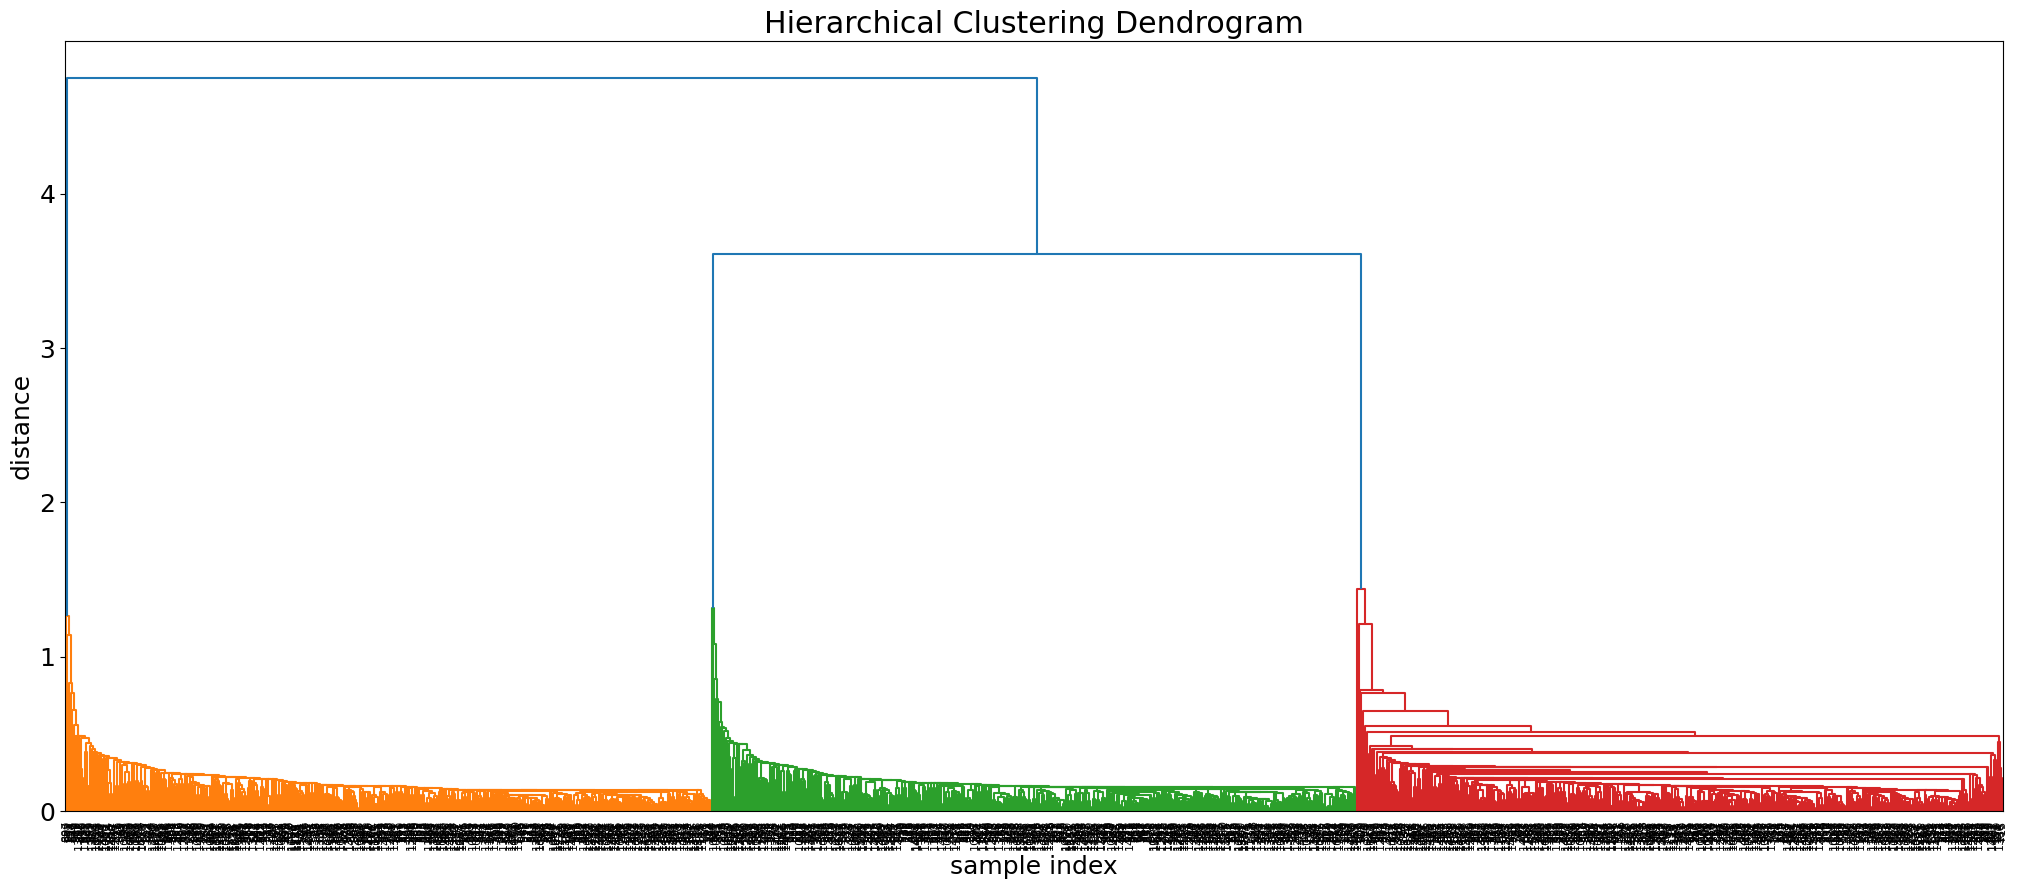

In [5]:
# now plot the dendogram

plt.figure(figsize=(25, 10))
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(z, 
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

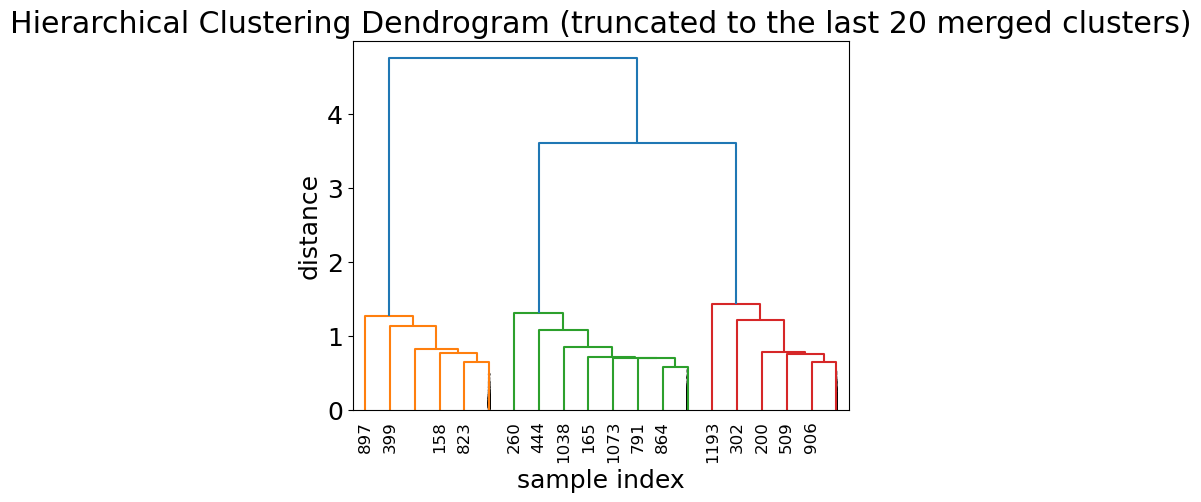

In [6]:
plt.title('Hierarchical Clustering Dendrogram (truncated to the last 20 merged clusters)')
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [7]:
# the Knee/Elbow Analysis
# First, compute the BSS and the WSS

wss_values = []
bss_values = []
k_values = range(1,20)

for k in k_values:
    clustering = fcluster(z, k, criterion='maxclust')
    centroids = [np.mean(x[clustering==c],axis=0) for c in range(1,k+1)]
    #cdist(x, centroids, 'euclidean')
    D = cdist(x, centroids, 'euclidean')
    cIdx = np.argmin(D,axis=1)
    d = np.min(D,axis=1)

    avgWithinSS = sum(d)/x.shape[0]

    # Total with-in sum of square
    wss = sum(d**2)

    tss = sum(pdist(x)**2)/x.shape[0]
    
    bss = tss-wss
    
    wss_values += [wss]
    bss_values += [bss]

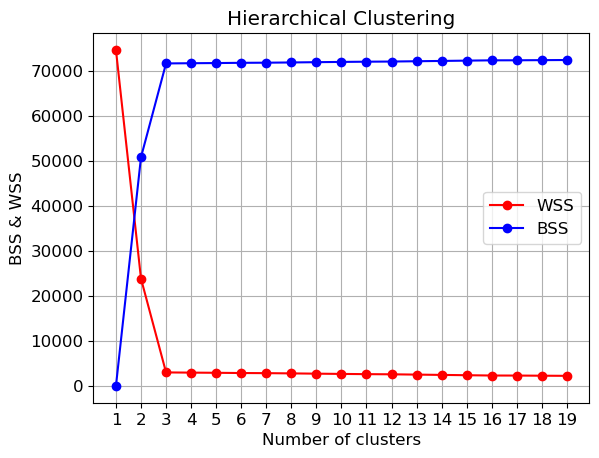

In [8]:
# plot WSS and BSS, we can see that after three cluster they remain continuos

fig = plt.figure()
font = {'family' : 'sans', 'size'   : 12}
plt.rc('font', **font)
plt.plot(k_values, wss_values, 'o-', color='red', label='WSS')
plt.plot(k_values, bss_values, 'o-', color='blue', label='BSS')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('BSS & WSS')
plt.xticks(k_values)
plt.legend()
plt.title('Hierarchical Clustering');

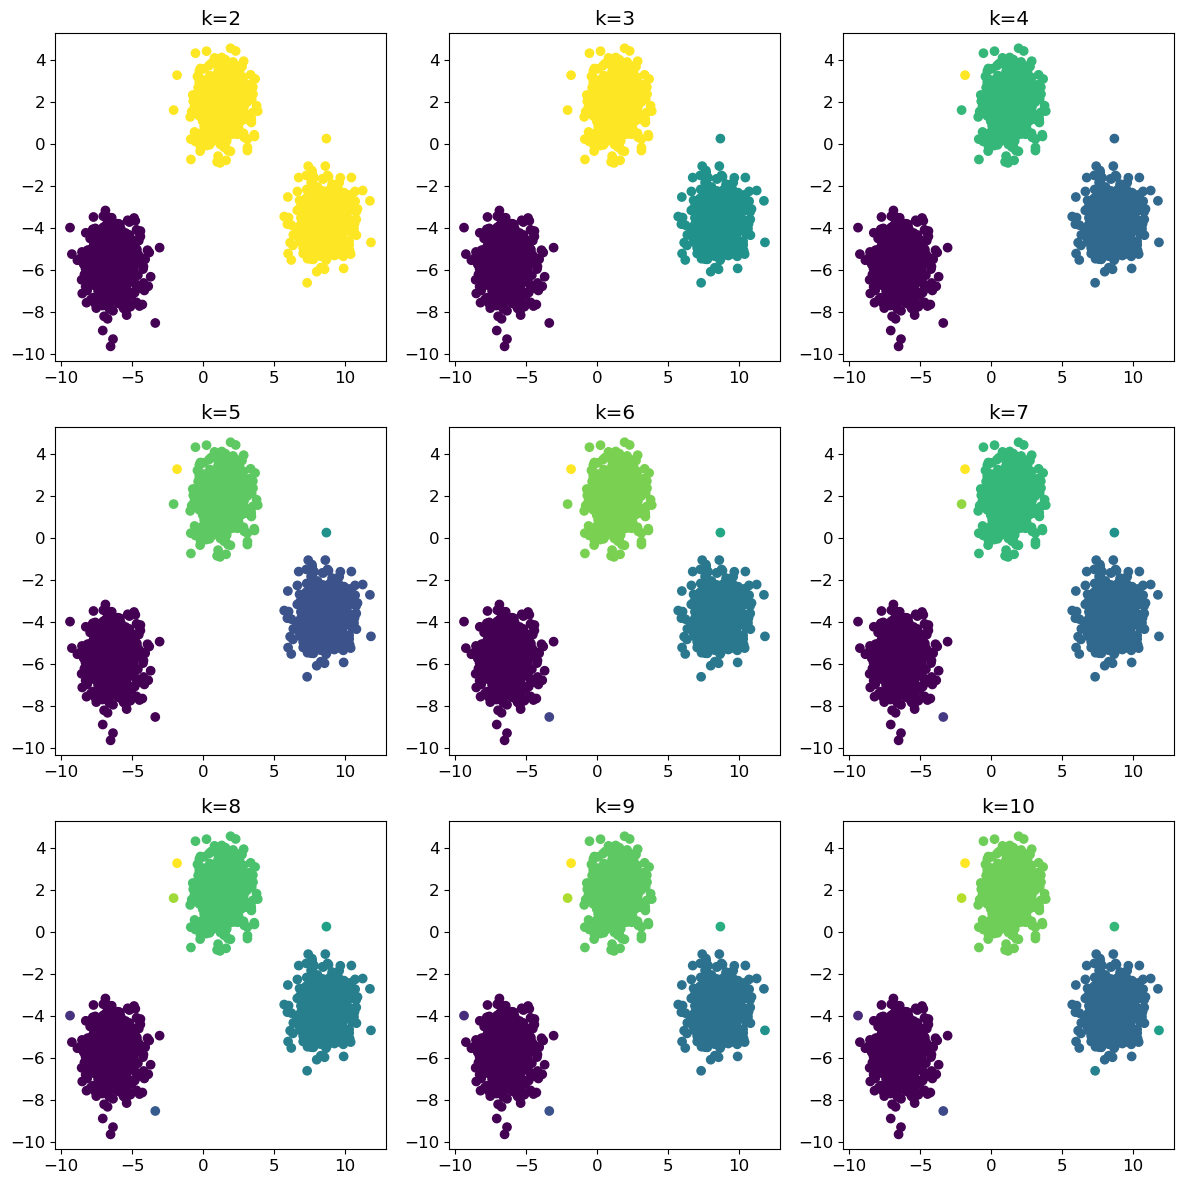

In [10]:
plt.figure(figsize=(12, 12));

for k in range(2,11):
    yp = fcluster(z, k, criterion='maxclust')

    plt.subplot(330+(k-1))
    plt.title('k='+str(k))
    plt.scatter(x[:, 0], x[:, 1], c=yp,cmap=plt.get_cmap())
    
plt.tight_layout()